In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

#import per la valutazione dei modelli, creazione train test split e cross validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split,cross_val_score

#modelli ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

#LISTA UTILE PER IMPORT DEI MODELLI

#feature selection and data processing
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler, OrdinalEncoder
from sklearn.preprocessing import RobustScaler #when you have many outliers



#classification
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#regression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge #least squares
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

#CV STRATIFICATA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#CROSS VALIDATE (diversa da cross_val_score)
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion

from sklearn.impute import SimpleImputer #rimuove gli NaN

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler #when you have many outliers

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

from sklearn.pipeline import make_pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import FunctionTransformer

#RANDOM SEARCH PER IPERPARAMETRI

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

#ESEMPIO GRID SEARCH DI IPERPARAMETRI PER IL MODELLO KNN

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve, validation_curve
from scipy.stats import uniform

from sklearn.utils import resample

from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer


In [85]:
df = pd.read_csv('salaries.csv', sep=';')
df

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Machine Learning Manager,Full-Time,Senior,Expert,United States,129562,Germany,Large,2023
1,BI Data Analyst,Full-Time,Entry,Junior,Kenya,50000,Kenya,Small,2023
2,AI Engineer,Full-Time,Senior,Expert,United States,227850,United States,Medium,2023
3,AI Engineer,Full-Time,Senior,Expert,United States,180500,United States,Medium,2023
4,Data Analyst,Full-Time,Mid,Intermediate,United States,90000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...
3465,Data Scientist,Full-Time,Senior,Expert,United States,412000,United States,Large,2020
3466,Principal Data Scientist,Full-Time,Mid,Intermediate,United States,151000,United States,Large,2021
3467,Data Scientist,Full-Time,Entry,Junior,United States,105000,United States,Small,2020
3468,Business Data Analyst,Contract,Entry,Junior,United States,100000,United States,Large,2020


In [86]:
print(f'Le istanze sono : {df.shape[0]}')
print(f'Valori nulli totali: {df.isnull().sum().sum()}')
print(df.isnull().sum())
print(f'\nÈ bilanciato? : {df['Experience Level'].value_counts()}')

Le istanze sono : 3470
Valori nulli totali: 0
Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

È bilanciato? : Experience Level
Senior       2187
Mid           833
Entry         296
Executive     154
Name: count, dtype: int64


Experience Level  Entry  Mid  Senior  Executive
Expertise Level                                
Director              0    0       0        154
Expert                0    0    2187          0
Intermediate          0  833       0          0
Junior              296    0       0          0


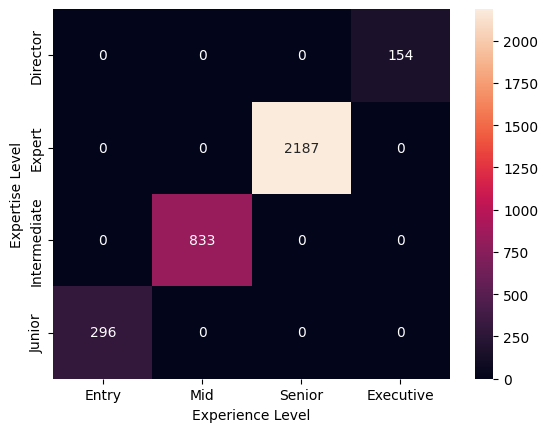

In [87]:
crosstab = pd.crosstab(df['Expertise Level'], df['Experience Level'])
ordine = ['Entry', 'Mid', 'Senior', 'Executive']
crosstab = crosstab.reindex(columns=ordine)

print(crosstab)

sns.heatmap(crosstab, annot=True, fmt='d')
plt.show()

Experience Level         Entry            Mid         Senior      Executive
Company Size                                                               
Large             76546.319149   91286.455172  151602.455446  181610.470588
Medium            84644.038217  116671.653543  162317.830237  190706.798450
Small             68835.644444   68613.075472  112724.765957  169172.375000


<Axes: xlabel='Experience Level', ylabel='Company Size'>

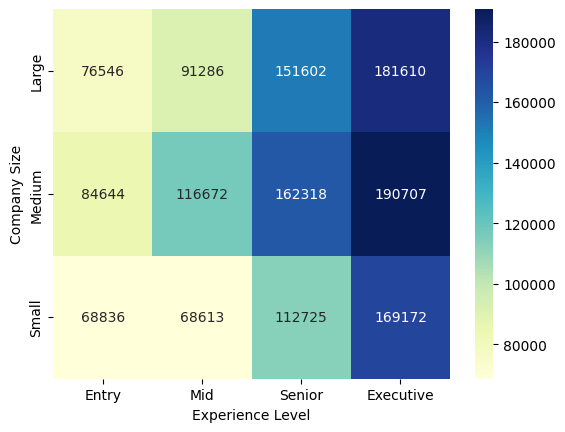

In [88]:
pivot = df.pivot_table(index='Company Size', columns='Experience Level', values='Salary in USD', aggfunc = 'mean')
ordine = ['Entry', 'Mid', 'Senior', 'Executive']
pivot = pivot.reindex(columns=ordine)
print(pivot)
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")


In [89]:
df[(df['Company Location']) != (df['Employee Residence'])].shape[0]

107

3. Il salario ricevuto dai lavoratori (Salary in USD) è distribuito nello stesso modo nelle imprese
di piccola, media e grande dimensione? Rappresentare con il/gli opportuni grafici il concetto. Il
salario ha poi la stessa distribuzione all’interno dei livelli di esperienza? (punti 3)

<Axes: xlabel='Company Size', ylabel='Salary in USD'>

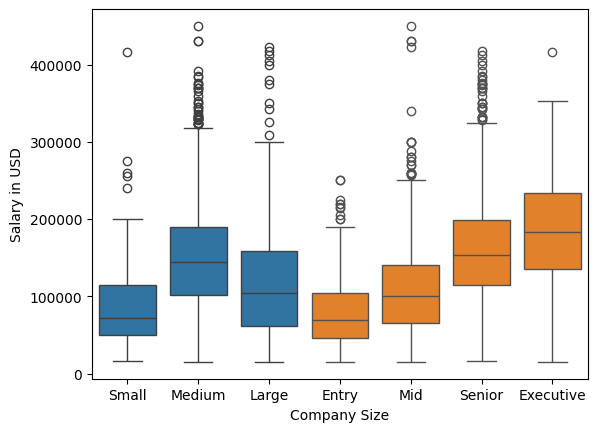

In [90]:
sns.boxplot(data = df, x='Company Size', y='Salary in USD', order = ['Small', 'Medium', 'Large'])
sns.boxplot(data = df, x='Experience Level', y='Salary in USD', order = ordine)

4. Quali sono i 5 lavori (Job Title) più remunerativi? (punti 2)

In [91]:
dfjob = df.groupby('Job Title')['Salary in USD'].mean()
dfjob.sort_values(ascending = False)[0:5]

,Salary in USD
Job Title,
Analytics Engineering Manager,399880.0
Data Science Tech Lead,375000.0
Managing Director Data Science,300000.0
AWS Data Architect,258000.0
Cloud Data Architect,250000.0


1. Si vuole predire il valore di Experience Level sulla base degli attributi presenti nel dataset.
Ricaricare il dataset originale, eliminare eventuali attributi inutili (giustificare la scelta),
eliminare le istanze che eventualmente contengono valori nulli, rendere tutti gli attributi
numerici utilizzando un ordinal encoder, e dividerlo in modo che 3/4 degli elementi siano
contenuti in un nuovo dataset “train” e 1/4 nel dataset “test”.
Allenare il train con il modello Decision Tree e valutare l’accuracy ottenuta calcolata sia sul
dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una
predizione basata sul modello KNeighborsClassifier. Effettuare alcune considerazioni sui risultati
ottenuti, tenendo in considerazione anche l’analisi della confusion matrix e la predizione
effettuata da un dummy classifier (punti 3)

In [92]:
df = pd.read_csv('salaries.csv', sep=';')
df.dropna(inplace = True)
df.drop('Expertise Level', axis = 1, inplace = True)
#Lo tolgo perché sarebbe come barare

In [93]:
enc = OrdinalEncoder()
X = df.drop('Experience Level', axis=1).copy()
y = df['Experience Level']
X = enc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify = y)

In [94]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
F1_dt_train = f1_score(y_pred, y_train, average = 'weighted')
acc_dt_train = accuracy_score(y_pred, y_train)
y_pred = dt.predict(X_test)
F1_dt_test = f1_score(y_pred, y_test, average = 'weighted')
acc_dt_test = accuracy_score(y_pred, y_test)

print(f'Per il decision Tree, F1 nel train: {F1_dt_train}, per il test {F1_dt_test}')
print(f'Per il decision Tree, accuracy nel train: {acc_dt_train}, per il test {acc_dt_test}')

print(confusion_matrix(y_pred, y_test))

Per il decision Tree, F1 nel train: 0.9334083055029596, per il test 0.5567823482923756
Per il decision Tree, accuracy nel train: 0.9350499615680246, per il test 0.5622119815668203
[[ 20   1  28  29]
 [  3   9  11  27]
 [ 24  13  72 104]
 [ 27  16  97 387]]


In [95]:
kn = KNeighborsClassifier()

kn.fit(X_train, y_train)
y_pred = kn.predict(X_train)
F1_kn_train = f1_score(y_pred, y_train, average = 'weighted')
acc_kn_train = accuracy_score(y_pred, y_train)
y_pred = kn.predict(X_test)
F1_kn_test = f1_score(y_pred, y_test, average = 'weighted')
acc_kn_test = accuracy_score(y_pred, y_test)

print(f'Per il KNeighborsClassifier, F1 nel train: {F1_kn_train}, per il test {F1_kn_test}')
print(f'Per il KNeighborsClassifier, accuracy nel train: {acc_kn_train}, per il test {acc_kn_test}')

print(confusion_matrix(y_pred, y_test))

Per il KNeighborsClassifier, F1 nel train: 0.7249634911170477, per il test 0.6020048594426232
Per il KNeighborsClassifier, accuracy nel train: 0.7132974634896234, per il test 0.5841013824884793
[[ 23   0  32  17]
 [  0   0   1   9]
 [ 24   7  60  97]
 [ 27  32 115 424]]


In [96]:
model = DummyClassifier(strategy = 'stratified')
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
acc_dum_train = accuracy_score(y_pred, y_train)
y_pred = model.predict(X_test)
acc_dum_test = accuracy_score(y_pred, y_test)
print(f'Per il Dummy: Train {acc_dum_train}, Test {acc_dum_test}')

Per il Dummy: Train 0.4719446579554189, Test 0.4815668202764977


2. Trovare i parametri migliori del classificatore DecisionTree. Agire sui parametri criterion e
min_samples_leaf. Verificare se l’accuratezza che si ottiene con la nuova configurazione supera
quella con i parametri di default ottenuta al punto 1 (punti 4)

In [97]:
params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [2, 3, 4, 5]
}
gs = GridSearchCV(dt, params)
gs.fit(X_train, y_train)
y_pred = gs.predict(X_train)
acc_gs_dt_train = accuracy_score(y_pred, y_train)
y_pred = gs.predict(X_test)
acc_gs_dt_test = accuracy_score(y_pred, y_test)
print(f'Per il train: {acc_gs_dt_train}, per il test: {acc_gs_dt_test}')
print(f'Con parametri: {gs.best_params_}')
print(gs.best_estimator_, gs.best_score_)

Per il train: 0.7628747117601845, per il test: 0.6382488479262672
Con parametri: {'criterion': 'gini', 'min_samples_leaf': 5}
DecisionTreeClassifier(min_samples_leaf=5) 0.5968684482504061


3. Creare una pipeline che a partire dal dataset numerico utilizzato nel punto 1 applichi
 il SimpleImputer per sostituire eventuali valori nulli (punti 1)
 divida in 10 bins i valori di Salary in USD (punti 2)
 applichi il DecisionTreeClassifier per effettuare la predizione (punti 1)

In [98]:
df1 = df.copy()
df1

,Job Title,Employment Type,Experience Level,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Machine Learning Manager,Full-Time,Senior,United States,129562,Germany,Large,2023
1,BI Data Analyst,Full-Time,Entry,Kenya,50000,Kenya,Small,2023
2,AI Engineer,Full-Time,Senior,United States,227850,United States,Medium,2023
3,AI Engineer,Full-Time,Senior,United States,180500,United States,Medium,2023
4,Data Analyst,Full-Time,Mid,United States,90000,United States,Medium,2023
...,...,...,...,...,...,...,...,...
3465,Data Scientist,Full-Time,Senior,United States,412000,United States,Large,2020
3466,Principal Data Scientist,Full-Time,Mid,United States,151000,United States,Large,2021
3467,Data Scientist,Full-Time,Entry,United States,105000,United States,Small,2020
3468,Business Data Analyst,Contract,Entry,United States,100000,United States,Large,2020


In [112]:
df1 = df.copy()
df1 = df1.drop('Experience Level', axis = 1)
feature_names = df1.columns
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)
X_test

,Job Title,Employment Type,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,9.0,2.0,6.0,145.0,6.0,1.0,2.0
1,89.0,2.0,70.0,805.0,80.0,1.0,2.0
2,61.0,2.0,70.0,596.0,80.0,1.0,3.0
3,82.0,2.0,70.0,848.0,80.0,0.0,2.0
4,33.0,2.0,69.0,1017.0,79.0,1.0,3.0
...,...,...,...,...,...,...,...
863,41.0,2.0,70.0,668.0,80.0,1.0,3.0
864,41.0,2.0,70.0,223.0,80.0,1.0,3.0
865,47.0,2.0,70.0,550.0,80.0,1.0,3.0
866,67.0,2.0,70.0,996.0,80.0,1.0,3.0


In [116]:
preprocessing = ColumnTransformer(
    transformers =[
        ('disc', KBinsDiscretizer(n_bins=10), ['Salary in USD'])
    ], remainder ='passthrough'
)
model = DecisionTreeClassifier()
pipe = Pipeline(
    steps = [
        ('prep', preprocessing),
        ('Si', SimpleImputer()),
        ('model', model)
    ]
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)
acc_pipe_train = accuracy_score(y_pred, y_train)
y_pred = pipe.predict(X_test)
acc_pipe_test = accuracy_score(y_pred, y_test)
print(f'L accuratezza nel train è {acc_pipe_train}, mentre nel test {acc_pipe_test}')

L accuratezza nel train è 0.8278247501921598, mentre nel test 0.6347926267281107


4. Estendere la pipeline del punto precedente aggiungendo a ogni feature una nuova feature che
rappresenti il valore della feature normalizzato. Applicare il DecisionTreeClassifier per
effettuare la predizione

In [117]:

identity_transformer = FunctionTransformer(lambda x: x, validate=False)

combined_features = FeatureUnion([
    ("original_features", identity_transformer),
    ("norm_features", MinMaxScaler())
])

pipe2 = Pipeline(
    steps = [
        ('comb', combined_features),
        ('Si', SimpleImputer()),
        ('model', model)
    ]
)

pipe2.fit(X_train, y_train)
print(X_train.shape, X_test.shape)
y_pred = pipe2.predict(X_train)
acc_pipe_train = accuracy_score(y_pred, y_train)
y_pred = pipe2.predict(X_test)
acc_pipe_test = accuracy_score(y_pred, y_test)
print(f'L accuratezza nel train è {acc_pipe_train}, mentre nel test {acc_pipe_test}')

(2602, 7) (868, 7)
L accuratezza nel train è 0.9350499615680246, mentre nel test 0.5599078341013825


5. Creare una pipeline che a partire dal dataset iniziale (dopo aver tolto le colonne rimosse al
punto 1)
 usi il SimpleImputer per inserire i valori nulli (punti 0.5)
 trasformi in vettori booleani (OneHotEncoder, sparse_output=False) le colonne 'Job Title',
'Employment Type', 'Company Location', 'Employee Residence' (punti 2)
 trasformi in valori numerici le colonne 'Year', 'Company Size' (punti 1)
 Applichi lo standard scaler sulla colonna Salary in USD (punti 1)
 applichi il DecisionTreeClassifier per effettuare la predizione (punti 0.5)

In [128]:
df = pd.read_csv('salaries.csv', sep=';')
df.dropna(inplace = True)
df.drop('Expertise Level', axis = 1, inplace = True)
#Lo tolgo perché sarebbe come barare

X = df.drop('Experience Level', axis=1).copy()
y = df['Experience Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify = y)
X_train

,Job Title,Employment Type,Company Location,Salary in USD,Employee Residence,Company Size,Year
3146,Data Analyst,Full-Time,United States,135000,United States,Medium,2022
466,Data Engineer,Full-Time,United States,118000,United States,Medium,2023
3350,AI Scientist,Full-Time,Spain,55000,Spain,Large,2021
2926,Data Scientist,Full-Time,Belgium,84053,Belgium,Large,2022
2689,Data Analyst,Full-Time,United States,139600,United States,Medium,2022
...,...,...,...,...,...,...,...
647,Analytics Engineer,Full-Time,United States,140000,United States,Medium,2023
2356,Data Engineer,Full-Time,United States,187000,United States,Medium,2022
1869,Data Science Manager,Full-Time,Mexico,90000,Mexico,Medium,2023
2297,NLP Engineer,Full-Time,Poland,44365,Poland,Small,2022


In [133]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.set_output(transform="pandas")

preprocessing = ColumnTransformer(
    transformers = [
        ('OHE', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Job Title', 'Employment Type', 'Company Location', 'Employee Residence']),
        ('OE', OrdinalEncoder(), ['Year', 'Company Size']),
        ('SS', StandardScaler(), ['Salary in USD'])
    ], remainder = 'passthrough'
)

model = DecisionTreeClassifier()
pipe3 = Pipeline(
    steps = [
        ('SI', imputer),
        ('prep', preprocessing),
        ('model', model)
    ]
)

pipe3.fit(X_train, y_train)
print(X_train.shape, X_test.shape)
y_pred = pipe3.predict(X_train)
acc_pipe_train = accuracy_score(y_pred, y_train)
y_pred = pipe3.predict(X_test)
acc_pipe_test = accuracy_score(y_pred, y_test)
print(f'L accuratezza nel train è {acc_pipe_train}, mentre nel test {acc_pipe_test}')

(2602, 7) (868, 7)
L accuratezza nel train è 0.9388931591083781, mentre nel test 0.5357142857142857


6. E’ possibile utilizzare un regressore linerare al posto del DecisionTree? In che modo? (punti 2)

In [140]:
model = LinearRegression()

pipe4 = Pipeline(
    steps = [
        ('SI', imputer),
        ('prep', preprocessing),
        ('model', model)
    ]
)
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

pipe4.fit(X_train, y_train)
print(X_train.shape, X_test.shape)
y_pred = np.round(pipe4.predict(X_train))
acc_pipe_train = accuracy_score(y_pred, y_train)
y_pred = np.round(pipe4.predict(X_test))
acc_pipe_test = accuracy_score(y_pred, y_test)
print(f'L accuratezza nel train è {acc_pipe_train}, mentre nel test {acc_pipe_test}')


(2602, 7) (868, 7)
L accuratezza nel train è 0.6014604150653343, mentre nel test 0.5391705069124424
